In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

In [76]:
def dIdt(t, I, V0, R, L):
    return (V0 - R * I)/L

def dIdt_nl(t, I, V0, R0, L, m):
    return (V0 - (R0 + m * I) * I)/L

def exp_fit(t, A, la):
    return A * (1 - np.exp(-la * t))

In [86]:
V0 = 12
R0 = 1500
m = 1e4
L = 10e-3

tau = L/R
tmax = 5*tau

N = 1000
dt = tmax/N

t = np.linspace(0, tmax, N)
It = np.zeros(N)

It[0] = 0

method = 'RK45'
model = 'nonlinear'

if method == 'Euler':
    for i in range(1, N):
        if model == 'linear':
            It[i] = It[i-1] + dIdt(t[i-1], It[i-1], V0=V0, R=R0, L=L) * dt
        elif model == 'nonlinear':
            It[i] = It[i-1] + dIdt_nl(t[i-1], It[i-1], V0=V0, R0=R0, m=m, L=L) * dt

elif method == 'RK45':
    if model == 'linear':
        sol = solve_ivp(dIdt, [0, tmax], [It[0]], t_eval=t, args=(V0, R0, L))
        It = sol.y[0]
    elif model == 'nonlinear':
        sol = solve_ivp(dIdt_nl, [0, tmax], [It[0]], t_eval=t, args=(V0, R0, L, m))
        It = sol.y[0]



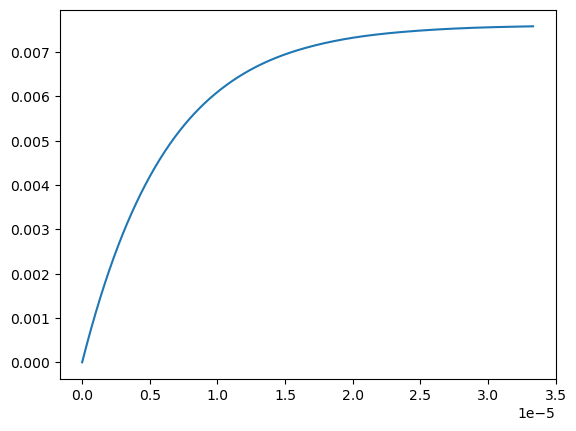

In [87]:
plt.plot(t, It)
plt.show()

In [88]:
param, cov = curve_fit(exp_fit, t, It)

I0_fit = param[0]
tau_fit = 1/param[1]

print(f'method: {method}')
print(f'max current: theoretical {V0/R0*1000:.3f} mA, fit {I0_fit*1000:.3f} mA')
print(f'time constant: theoretical {L/R0*1e6:.3f} µs, fit {tau_fit*1e6:.3f} µs')

method: RK45
max current: theoretical 8.000 mA, fit 7.627 mA
time constant: theoretical 6.667 µs, fit 6.244 µs
